# Value Investing Tools Library
This notebook walks you through how to use the Value Investing Tools library which is a bundled set of functions that uses raw data from yahoo finance to return some helpful metrics / analysis typically used in Value Investment analysis

This function mirrors an equity researcher's typical workflow going from analysing a single company's performance to comparing it to other peer group companies and then finally taking a more detailed look at the target company's financials to derive it's underlying value vs what the market perceives it to be

In [1]:
import ValueInvestingTools as vit
import yfinance as yf
import pandas as pd

In [2]:
#set up and choose which companies to explore

target_ticker="MSFT"

peer1="GOOGL"
peer2="AMZN"
peer3="AAPL"
peer4="META"
peer5="NVDA"

peer_group=[target_ticker,peer1,peer2,peer3,peer4,peer5]


## Other Tickers To Try Out
**Retailers**
- Home Depot (HD)
- Lowe's Companies (LOW)
- Walmart (WMT)
- Target (TGT)
- Costco Wholesale (COST)
- BJ's Wholesale Club (BJ)
- The Kroger Co. (KR)

target_ticker="WMT",
peer1="HD",
peer2="LOW",
peer3="TGT",
peer4="COST",
peer5="BJ",
peer6="KR"

peer_group=[target_ticker,peer1,peer2,peer3,peer4,peer5,peer6]

**Pharma/Biotech**
- Johnson & Johnson (JNJ)
- Merck & Co. (MRK)
- Pfizer (PFE)
- Bristol-Myers Squibb (BMY)
- Amgen (AMGN)
- Moderna (MRNA)
- BioNTech (BNTX)

target_ticker="JNJ",
peer1="MRK",
peer2="PFE",
peer3="BMY",
peer4="AMGN",
peer5="MRNA",
peer6="BNTX"

peer_group=[target_ticker,peer1,peer2,peer3,peer4,peer5,peer6]

**Hospitality**
- Marriott International (MAR)
- Hilton Worldwide Holdings (HLT)
- Hyatt Hotels (H)
- Airbnb (ABNB)
- Booking Holdings (BKNG)
- MGM Resorts International (MGM)
- Caesars Entertainment (CZR)
- Wynn Resorts (WYNN)

target_ticker="MAR",
peer1="HLT",
peer2="H",
peer3="ABNB",
peer4="BKNG",
peer5="MGM",
peer6="CZR",
peer7="WYNN"

peer_group=[target_ticker,peer1,peer2,peer3,peer4,peer5,peer6,peer7]


## 1.0 Basic Data Exploration & Extraction From YFinance 
Yahoo Finance has a free API that allows for access to financial information
As a first step , good to review what is available 

In [3]:
#View full info available from yahoo finance 
print(peer1)
for key, value in yf.Ticker(peer1).info.items():
    print(f"{key}: {value}")


GOOGL
address1: 1600 Amphitheatre Parkway
city: Mountain View
state: CA
zip: 94043
country: United States
phone: 650-253-0000
website: https://abc.xyz
industry: Internet Content & Information
industryKey: internet-content-information
industryDisp: Internet Content & Information
sector: Communication Services
sectorKey: communication-services
sectorDisp: Communication Services
longBusinessSummary: Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, devices, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play and YouTube; and devices, as well as in the provision of YouTube consumer subscription s

In [4]:
#A lot of information is available but these tend to be Trailing Twelve Months or Most Recent Quarters
print(peer1)
print("Example Quick Stats")
print("-------------------")
print("Net Profit Margin(TTM):", yf.Ticker("GOOGL").info['profitMargins'])
print("returnOnAssets (TTM)", yf.Ticker("GOOGL").info['returnOnAssets'])
print("currentRatio (MRQ):", yf.Ticker("GOOGL").info['currentRatio'])

GOOGL
Example Quick Stats
-------------------
Net Profit Margin(TTM): 0.31118
returnOnAssets (TTM) 0.16792
currentRatio (MRQ): 1.904


In [5]:
#Yfinance provides financial statements Income Statement, Balance Sheet , Cash Flow Statement for a 4-5 year lookback window
print(peer1)
pd.DataFrame(yf.Ticker(peer1).balance_sheet) # can also try cashflow or income_stmt 


GOOGL


,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Treasury Shares Number,NaN,0.0,NaN,NaN,NaN
Ordinary Shares Number,12211000000.0,12460000000.0,12849000000.0,13242420000.0,NaN
Share Issued,12211000000.0,12460000000.0,12849000000.0,13242420000.0,NaN
Total Debt,25461000000.0,27121000000.0,29679000000.0,28395000000.0,NaN
Tangible Book Value,293199000000.0,254181000000.0,227184000000.0,227262000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,-879000000.0,-771000000.0,-754000000.0,-550000000.0,NaN
Gross Accounts Receivable,53219000000.0,48735000000.0,41012000000.0,39854000000.0,NaN
Cash Cash Equivalents And Short Term Investments,95657000000.0,110916000000.0,113762000000.0,139649000000.0,NaN
Other Short Term Investments,72191000000.0,86868000000.0,91883000000.0,118704000000.0,NaN


## 1.1 Limitations Of Using YFinance Library By Itself
- Wide range of metrics but some are limited in time (only latest MRQ or TTM values) and difficult to compare across time
- Comparing values across multiple companies will require data wrangling / custom scripts
- While a trusted source for financial data - not always clear how certain metrics or ratios are calculated as they are themselves a mix of multiple sources (Refinitiv, Morningstar,EDGAR Online, etc)

## 2.0 Value Investing Tools 
VIT provides a set of pre-packaged functions to simplify the data extractions/overviews

### 2.1 Annual Averages vs TTM Key Factors
Every company has a set of intrinsic drivers that shape its long-term value, regardless of short-term market noise. 

These are grouped into 4 key areas:
-Profitability – efficiency in generating returns on capital and margins.
-Growth – ability to scale revenues and earnings over time.
-Reinvestment – discipline and capacity to reinvest earnings to compound value.
-Risk – balance sheet strength and exposure to volatility.

Fundamentals_ttm_vs_average returns both TTM values but also average metric values CALCULATED from historical financial statements 

In [6]:
summary_df = vit.fundamentals_ttm_vs_average(target_ticker, include_ttm=True, return_format="wide",as_df=True)
print("=== TTM vs Average fundamentals ("+target_ticker+") ===")
summary_df

=== TTM vs Average fundamentals (MSFT) ===


,Metric,Average_Value,Notes,TTM_Value,Window
0,Growth-EarningsCAGR,0.118685,,NaN,2022–2025 (4y)
1,Growth-PEG-TTM,NaN,,2.268900,TTM
2,Growth-RevenueCAGR,0.124231,,NaN,2022–2025 (4y)
3,Profitability-NetMargin,0.357336,,0.361460,2021–2025
4,Profitability-OpMargin,0.435236,,0.456220,2021–2025
5,Profitability-ROA,0.185697,,0.164510,2021–2025
6,Profitability-ROE,0.364127,,0.296472,2021–2025
7,Reinvestment-CapexRatio,0.165921,,0.229129,2022–2025 (4y)
8,Reinvestment-ReinvestmentRate,0.748387,,0.763512,2022–2025 (4y)
9,Risk-Beta-TTM,NaN,,1.040000,TTM


In [7]:
summary_df = vit.fundamentals_ttm_vs_average(peer1, include_ttm=True, return_format="wide",as_df=True)
print("=== TTM vs Average fundamentals ("+peer1+") ===")
summary_df

=== TTM vs Average fundamentals (GOOGL) ===


,Metric,Average_Value,Notes,TTM_Value,Window
0,Growth-EarningsCAGR,0.096066,,NaN,2021–2024 (4y)
1,Growth-PEG-TTM,NaN,,1.732800,TTM
2,Growth-RevenueCAGR,0.107543,,NaN,2021–2024 (4y)
3,Profitability-NetMargin,0.258315,,0.311183,2020–2024
4,Profitability-OpMargin,0.291363,,0.326791,2020–2024
5,Profitability-ROA,0.197549,,0.230201,2020–2024
6,Profitability-ROE,0.279618,,0.318457,2020–2024
7,Reinvestment-CapexRatio,0.115492,,0.180345,2021–2024 (4y)
8,Reinvestment-ReinvestmentRate,0.981614,,0.914565,2021–2024 (4y)
9,Risk-Beta-TTM,NaN,,1.011000,TTM


In [8]:
summary_df = vit.fundamentals_ttm_vs_average(peer2, include_ttm=True, return_format="wide",as_df=True)
print("=== TTM vs Average fundamentals ("+peer2+") ===")
summary_df

=== TTM vs Average fundamentals (AMZN) ===


,Metric,Average_Value,Notes,TTM_Value,Window
0,Growth-EarningsCAGR,0.210966,,NaN,2021–2024 (4y)
1,Growth-PEG-TTM,NaN,,2.051900,TTM
2,Growth-RevenueCAGR,0.107354,,NaN,2021–2024 (4y)
3,Profitability-NetMargin,0.052881,,0.105401,2020–2024
4,Profitability-OpMargin,0.062104,,0.113710,2020–2024
5,Profitability-ROA,0.052687,,0.103527,2020–2024
6,Profitability-ROE,0.132882,,0.211589,2020–2024
7,Reinvestment-CapexRatio,0.118904,,0.160671,2021–2024 (4y)
8,Reinvestment-ReinvestmentRate,1.000000,,NaN,2021–2024 (4y)
9,Risk-Beta-TTM,NaN,,1.309000,TTM


VIT also has functions for drilling deeper to visualize the information on a per year basis...

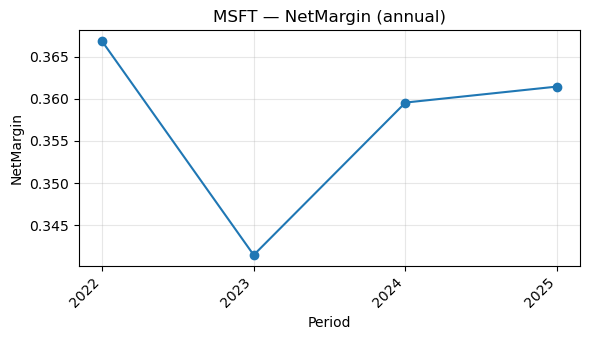

In [9]:
# Single ticker, single metric
fig, ax = vit.plot_single_metric_ts(target_ticker, "NetMargin", family="Profitability", basis="annual")

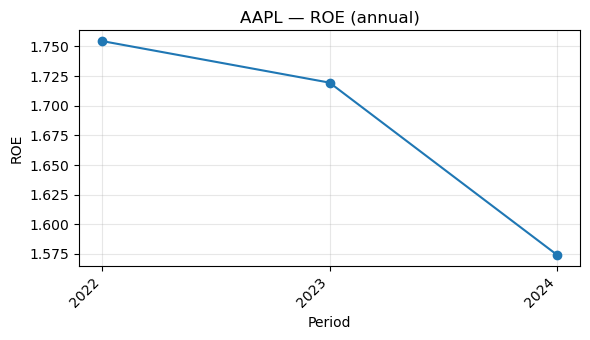

In [10]:
# Single ticker, single metric
fig, ax = vit.plot_single_metric_ts(peer3, "ROE", family="Profitability", basis="annual")

In [11]:
vit._price_snapshots(target_ticker) #Get current price

(517.9299926757812, '2025-09-19', '')

In [12]:
pd.DataFrame(vit.historical_average_share_prices(peer_group)) #Extract hustorical prices for multiple tickers

,ticker,price_asof,avg_price_1d,avg_price_30d,avg_price_90d,avg_price_180d,notes
0,MSFT,2025-09-19,517.929993,505.855716,507.739977,465.649582,
1,GOOGL,2025-09-19,254.720001,229.226600,201.533147,182.157763,
2,AMZN,2025-09-19,231.479996,230.419999,225.893651,211.214880,
3,AAPL,2025-09-19,245.500000,233.920000,220.258686,211.944234,
4,META,2025-09-19,778.380005,755.536188,741.265079,674.228342,
5,NVDA,2025-09-19,176.669998,175.126763,171.571586,147.029899,


### 2.2 Extending The Analysis To MULTIPLE Companies
The compute_fundamentals_actuals is a function that allows for mass extraction of the same data (For both TTM and Annual basis)

In [13]:
actuals_df_ttm= vit.compute_fundamentals_actuals(peer_group,basis= "ttm")
actuals_df_ttm

,ticker,Profitability-ROE-TTM,Profitability-NetMargin-TTM,Profitability-OpMargin-TTM,Profitability-ROA-TTM,Growth-RevenueCAGR-Ave,Growth-EarningsCAGR-Ave,Growth-PEG-TTM,Reinvestment-ReinvestmentRate-TTM,Reinvestment-CapexRatio-TTM,Risk-DebtEquityRatio-TTM,Risk-Beta-TTM,Risk-CurrentRatio-TTM,period_range,period_count,data_incomplete
0,MSFT,0.296472,0.361460,0.456220,0.164510,0.124231,0.118685,2.2689,0.763512,0.229129,0.176395,1.040,1.353,TTM (last 4Q),4,False
1,GOOGL,0.318457,0.311183,0.326791,0.230201,0.107543,0.096066,1.7328,0.914565,0.180345,0.097981,1.011,1.904,TTM (last 4Q),4,False
2,AMZN,0.211589,0.105401,0.113710,0.103527,0.107354,0.210966,2.0519,1.000000,0.160671,0.401285,1.309,1.024,TTM (last 4Q),4,False
3,AAPL,1.508127,0.242961,0.318664,0.299492,0.022470,-0.003335,2.3591,0.845256,0.030299,1.544858,1.109,0.868,TTM (last 4Q),4,False
4,META,0.366571,0.399918,0.440203,0.242607,0.117333,0.165682,2.1250,0.927434,0.291727,0.254063,1.242,1.973,TTM (last 4Q),4,False
5,NVDA,0.864837,0.524138,0.580935,0.615298,0.692547,0.955112,1.3172,0.988706,0.030336,0.105841,2.102,4.214,TTM (last 4Q),4,False


In [14]:
actuals_df_annual = vit.compute_fundamentals_actuals(peer_group, basis="annual", save_csv=False) 
# this save_csv option allows for saving a CSV into a folder called "Output"
actuals_df_annual

,ticker,Profitability-ROE-Ave,Profitability-NetMargin-Ave,Profitability-OpMargin-Ave,Profitability-ROA-Ave,Growth-RevenueCAGR-Ave,Growth-EarningsCAGR-Ave,Growth-PEG-TTM,Reinvestment-ReinvestmentRate-Ave,Reinvestment-CapexRatio-Ave,Risk-DebtEquityRatio-Ave,Risk-Beta-TTM,Risk-CurrentRatio-Ave,period_range,period_count,data_incomplete
0,MSFT,0.364127,0.357336,0.435236,0.185697,0.124231,0.118685,2.2689,0.748387,0.165921,0.271274,1.040,1.545544,2022-2025,4,False
1,GOOGL,0.279618,0.258315,0.291363,0.197549,0.107543,0.096066,1.7328,0.981614,0.115492,0.100684,1.011,2.309906,2021-2024,4,False
2,AMZN,0.132882,0.052881,0.062104,0.052687,0.107354,0.210966,2.0519,1.000000,0.118904,0.732719,1.309,1.047304,2021-2024,4,False
3,AAPL,1.682738,0.251172,0.303507,0.273307,0.022470,-0.003335,2.3591,0.845268,0.027552,2.109561,1.109,0.952308,2020-2024,5,False
4,META,0.278987,0.300428,0.353245,0.188943,0.117333,0.165682,2.1250,0.979666,0.213221,0.208581,1.242,2.751642,2020-2024,5,False
5,NVDA,0.761897,0.392812,0.436306,0.493679,0.692547,0.955112,1.3172,0.960813,0.036641,0.343913,2.102,4.694262,2022-2025,4,False


In [15]:
actuals_df_annual.columns

Index(['ticker', 'Profitability-ROE-Ave', 'Profitability-NetMargin-Ave',
       'Profitability-OpMargin-Ave', 'Profitability-ROA-Ave',
       'Growth-RevenueCAGR-Ave', 'Growth-EarningsCAGR-Ave', 'Growth-PEG-TTM',
       'Reinvestment-ReinvestmentRate-Ave', 'Reinvestment-CapexRatio-Ave',
       'Risk-DebtEquityRatio-Ave', 'Risk-Beta-TTM', 'Risk-CurrentRatio-Ave',
       'period_range', 'period_count', 'data_incomplete'],
      dtype='object')

## 2.3 Scoring & Ranking Companies By Four Fundamental Factors

By scoring and aggregating these factors consistently across companies, we create a deterministic baseline of financial quality that can be compared across industries and cycles.

The VIT tool uses absolute thresholds (NOT RELATIVE) so that:
-A score of 5 always means “excellent” in real financial terms, not just “better than peers.”
-Scores are stable across time and do not drift if industry peers get weaker or stronger.
-A single company can be scored in isolation without requiring a peer set.

Details on scoring methodology and thresholds are available within the README

The compute_fundamentals_scores function produces a table with the scores that can be visualized with plot_scores_clustered

In [16]:
scores_df_annual  = vit.compute_fundamentals_scores(actuals_df_annual, basis="annual", merge_with_actuals=False)
scores_df_annual

,ticker,score_Profitability-ROE-Ave,score_Profitability-NetMargin-Ave,score_Profitability-OpMargin-Ave,score_Profitability-ROA-Ave,score_Growth-RevenueCAGR-Ave,score_Growth-EarningsCAGR-Ave,score_Growth-PEG-TTM,score_Reinvestment-ReinvestmentRate-Ave,score_Reinvestment-CapexRatio-Ave,score_Risk-DebtEquityRatio-Ave,score_Risk-Beta-TTM,score_Risk-CurrentRatio-Ave,profitability_score,growth_score,reinvestment_score,risk_score,total_score
0,MSFT,5,5,5,5,4,4,2,4,1,5,4,4,5.0,3.6,2.8,4.4,15.8
1,GOOGL,5,5,5,5,4,3,3,5,1,5,4,5,5.0,3.4,3.4,4.6,16.4
2,AMZN,3,2,2,2,4,5,2,5,1,4,3,3,2.3,4.0,3.4,3.4,13.1
3,AAPL,5,5,5,5,2,1,2,5,3,1,4,2,5.0,1.6,4.2,2.4,13.2
4,META,5,5,5,5,4,5,2,5,1,5,3,5,5.0,4.0,3.4,4.2,16.6
5,NVDA,5,5,5,5,5,5,4,5,3,5,1,5,5.0,4.8,4.2,3.4,17.4


In [17]:
vit.compute_fundamentals_scores(vit.compute_fundamentals_actuals(peer_group),merge_with_actuals=True)

,ticker,Profitability-ROE-Ave,Profitability-NetMargin-Ave,Profitability-OpMargin-Ave,Profitability-ROA-Ave,Growth-RevenueCAGR-Ave,Growth-EarningsCAGR-Ave,Growth-PEG-TTM,Reinvestment-ReinvestmentRate-Ave,Reinvestment-CapexRatio-Ave,...,score_Reinvestment-ReinvestmentRate-Ave,score_Reinvestment-CapexRatio-Ave,score_Risk-DebtEquityRatio-Ave,score_Risk-Beta-TTM,score_Risk-CurrentRatio-Ave,profitability_score,growth_score,reinvestment_score,risk_score,total_score
0,MSFT,0.364127,0.357336,0.435236,0.185697,0.124231,0.118685,2.2689,0.748387,0.165921,...,4,1,5,4,4,5.0,3.6,2.8,4.4,15.8
1,GOOGL,0.279618,0.258315,0.291363,0.197549,0.107543,0.096066,1.7328,0.981614,0.115492,...,5,1,5,4,5,5.0,3.4,3.4,4.6,16.4
2,AMZN,0.132882,0.052881,0.062104,0.052687,0.107354,0.210966,2.0519,1.000000,0.118904,...,5,1,4,3,3,2.3,4.0,3.4,3.4,13.1
3,AAPL,1.682738,0.251172,0.303507,0.273307,0.022470,-0.003335,2.3591,0.845268,0.027552,...,5,3,1,4,2,5.0,1.6,4.2,2.4,13.2
4,META,0.278987,0.300428,0.353245,0.188943,0.117333,0.165682,2.1250,0.979666,0.213221,...,5,1,5,3,5,5.0,4.0,3.4,4.2,16.6
5,NVDA,0.761897,0.392812,0.436306,0.493679,0.692547,0.955112,1.3172,0.960813,0.036641,...,5,3,5,1,5,5.0,4.8,4.2,3.4,17.4


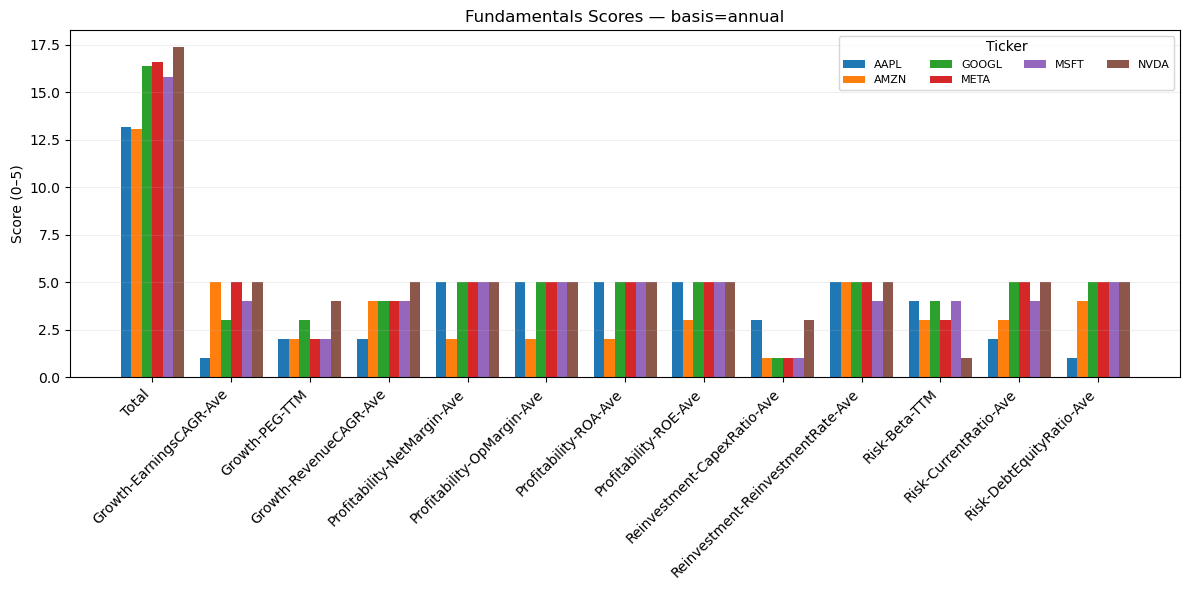

In [18]:
# A) Quick compare of all score elements (plus total_score) for 4 tickers, annual basis
fig, ax = vit.plot_scores_clustered(peer_group, basis="annual", include_total=True, sort_by="family")

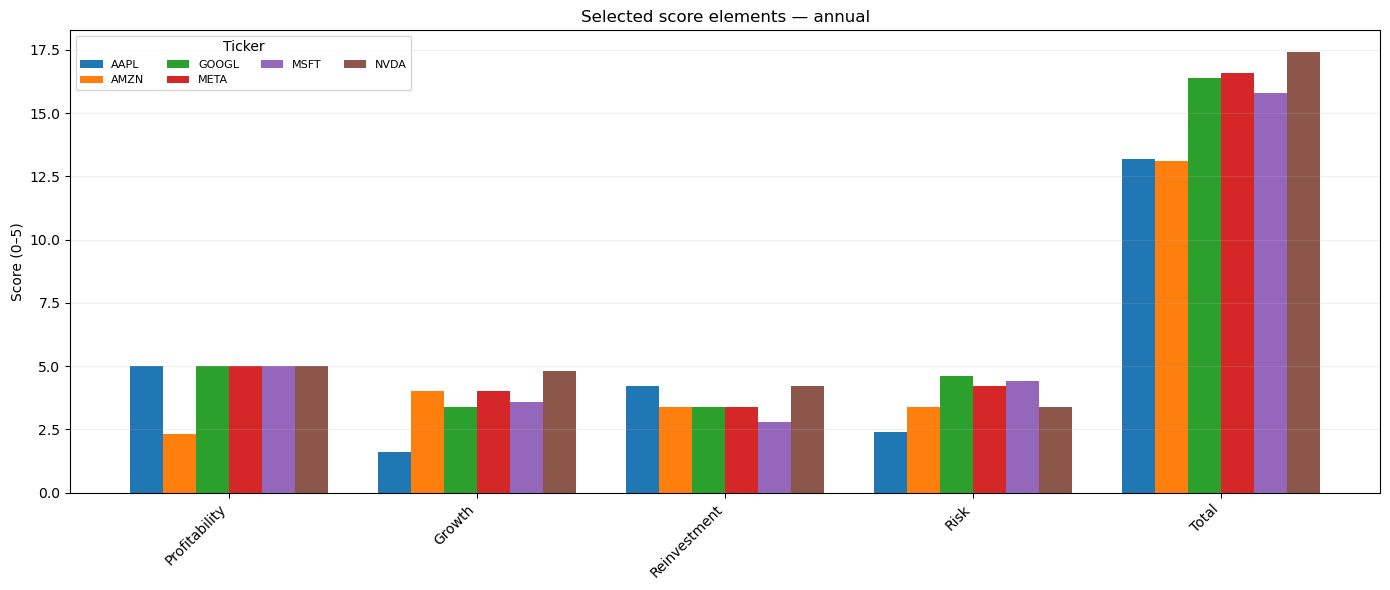

In [19]:
# B) Only a subset of metrics (names can be with or without 'score_' prefix)

selected_metrics=["profitability_score","growth_score","reinvestment_score","risk_score"]

fig, ax = vit.plot_scores_clustered(scores_df_annual, metrics= selected_metrics, figsize=(14,6),
    title="Selected score elements — annual",include_total=True)


## 2.3 Deeper Dives Into Change Over Time Between Companies Or Metrics

VIT contains a few more functions that help vizualise
- Changes over time for MULTIPLE metrics for a SINGLE company 
- Changes over time between MULTIPLE companies for a SINGLE/MULTIPLE metric  

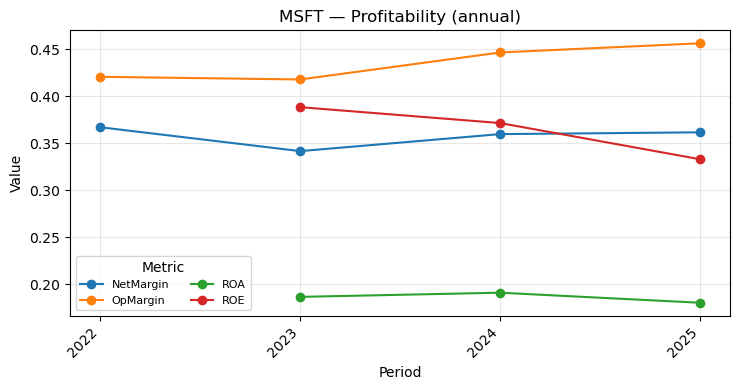

In [20]:
# Visualize a single ticker but for multiple metrics
fig, ax = vit.plot_metrics_family_ts(target_ticker, "Profitability",
                                 metrics=["ROE","NetMargin","OpMargin","ROA"],
                                 basis="annual")

(<Figure size 750x960 with 4 Axes>,
 array([<Axes: title={'center': 'NetMargin'}, xlabel='Period', ylabel='Value'>,
        <Axes: title={'center': 'OpMargin'}, xlabel='Period', ylabel='Value'>,
        <Axes: title={'center': 'ROA'}, xlabel='Period', ylabel='Value'>,
        <Axes: title={'center': 'ROE'}, xlabel='Period', ylabel='Value'>],
       dtype=object))

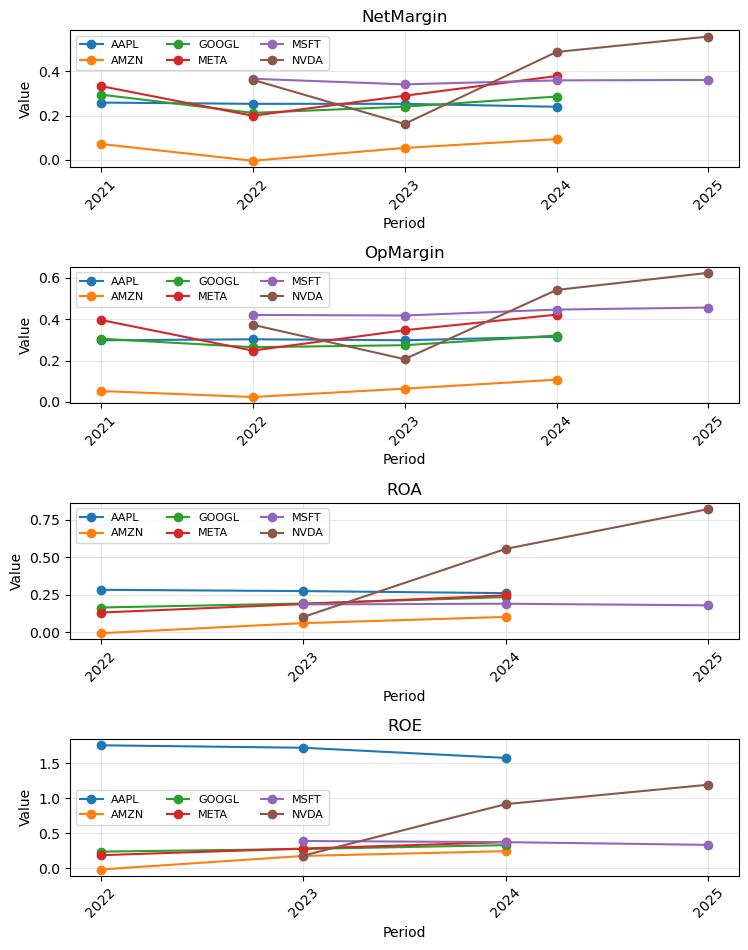

In [21]:
# Visualize a multiple metric but for MULTIPLE companies

vit.plot_multi_tickers_multi_metrics_ts(peer_group,family="Profitability") #can also try Growth , Reinvestment or Risk

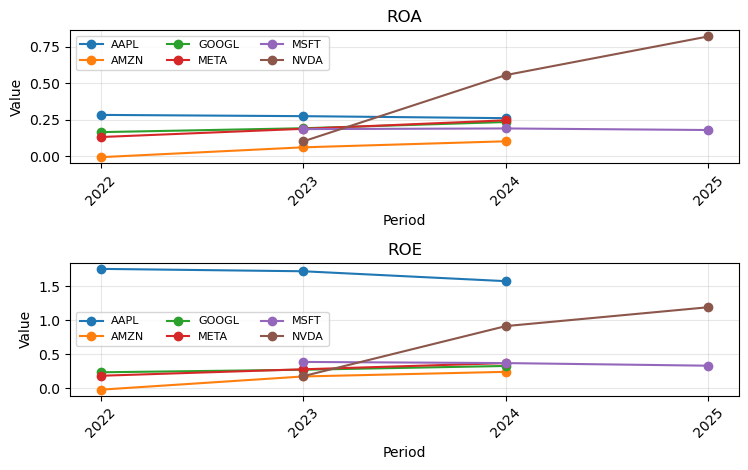

In [22]:
fig, axes = vit.plot_multi_tickers_multi_metrics_ts(peer_group, "Profitability",
                                                metrics=["ROE","ROA"], #Allows you to zoom into specific metrics
                                                basis="annual")

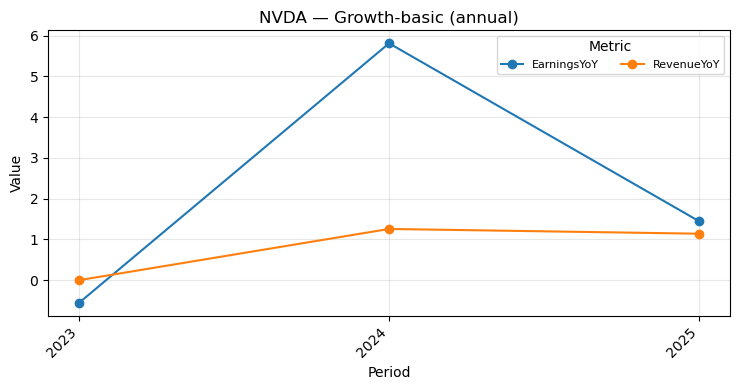

In [23]:
# Growth time series (YoY) examples
fig, ax = vit.plot_metrics_family_ts(peer5, "Growth-basic",
                                 metrics=["RevenueYoY","EarningsYoY"],
                                 basis="annual")

## 2.4 Market Comparisons For Price to X Type Ratios 

- In addition, VIT pulls the latest PE, PS, EV/EBITDA (NB : Sourced as TTM ratios (latest trailing-twelve-months), not multi-year averages unlike the previous function for fundamental factors which allows for both TTM and Annual Average)

- Note these are RELATIVE (i.e highly dependent on the peer group selected) unlike the previous section which was calculated on an ABSOLUTE basis 

- The peer_multiples function produces two tables - first being the ranges and second being the full set of data used to derive these

- The plot_peer_metric_boxplot function allows users to plot the ranges as a box plot and also indicate the position of the target ticker


In [24]:
print("Ticker: "+peer5)
print("PE: "+str(yf.Ticker(peer5).info.get("trailingPE")))
print("PE: "+str(yf.Ticker(peer5).info.get("priceToSalesTrailing12Months")))
print("EV/EBITDA: "+str(yf.Ticker(peer5).info.get("enterpriseToEbitda")))

Ticker: NVDA
PE: 50.16949
PE: 26.023785
EV/EBITDA: 43.212


In [25]:
#For this block, we are changing the target_ticker by setting it to peer5

bands = vit.peer_multiples(peer_group,target_ticker=peer5)  # by default the target company is EXCLUDED when estimating the ranges 

In [26]:
bands["peer_multiple_bands_wide"]

,Min,P25,Median,P75,Max,Average
PE,27.184631,28.253359,35.340458,37.310030,38.027164,33.223128
PS,3.684439,8.302142,8.916038,10.936002,13.665360,9.100796
EV_EBITDA,18.942000,20.767000,21.493000,24.708000,26.039000,22.389800


In [27]:
# however the target comp can be included (eg if the sample size is small)
bands_w_target_included = vit.peer_multiples(peer_group,target_ticker=peer5, include_target=True)

In [28]:
bands_w_target_included ["peer_multiple_bands_wide"]

,Min,P25,Median,P75,Max,Average
PE,27.184631,30.025134,36.325244,37.847881,50.169490,36.047522
PS,3.684439,8.455616,9.926020,12.983021,26.023785,11.921294
EV_EBITDA,18.942000,20.948500,23.100500,25.706250,43.212000,25.860167


In [29]:
#this provides the "raw" values including the 
bands["peer_comp_detail"]

,ticker,revenue_series,beta,shares_outstanding,cashflow,market_cap,ebitda,revenue,earnings,pe_ratio,ps_ratio,ev_to_ebitda,current_price,free_cash_flow
0,MSFT,2025-06-30 281724000000.0 2024-06-30 245...,1.040,7433166379,...,3849859891200,156528001024,281723994112,101831999488,38.027164,13.665360,24.708,517.9300,61070376960
1,GOOGL,2024-12-31 350018000000.0 2023-12-31 307...,1.011,5817000000,...,3083407196160,140840992768,371399000064,115572998144,27.184631,8.302142,21.493,254.7200,49786499072
2,AMZN,2024-12-31 637959000000.0 2023-12-31 574...,1.309,10664912097,...,2468713857024,133831999488,670038032384,70623002624,35.340458,3.684439,18.942,231.4800,31024001024
3,AAPL,2024-09-30 391035000000.0 2023-09-30 383...,1.109,14840390000,...,3643315585024,141696008192,408624988160,99280003072,37.310030,8.916038,26.039,245.5000,94873747456
4,META,2024-12-31 164501000000.0 2023-12-31 134...,1.242,2168962480,...,1955400777728,94279999488,178803998720,71507001344,28.253359,10.936002,20.767,778.3800,31991250944
5,NVDA,2025-01-31 130497000000.0 2024-01-31 60...,2.102,24347000000,...,4299597545472,98280996864,165217992704,86597001216,50.169490,26.023785,43.212,176.5966,52436750336


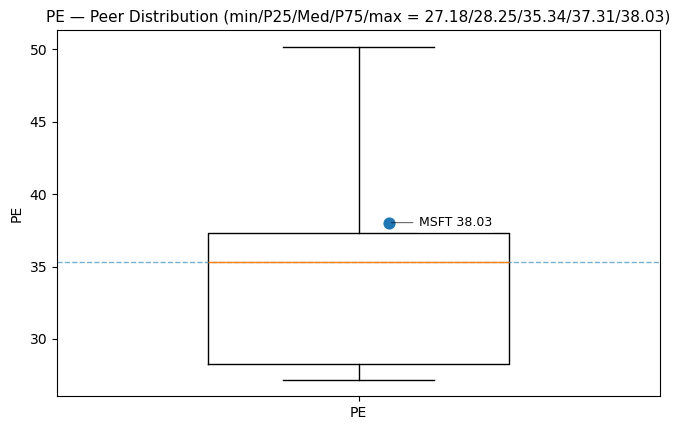

In [30]:
# Plot EV/EBITDA (peers-only distribution) with MSFT overlaid
fig, ax = vit.plot_peer_metric_boxplot(
    peer_comp_detail=bands["peer_comp_detail"],
    peer_multiple_bands_wide=bands["peer_multiple_bands_wide"],
    metric="PE",
    target_ticker=target_ticker,
    include_target_in_stats=False)

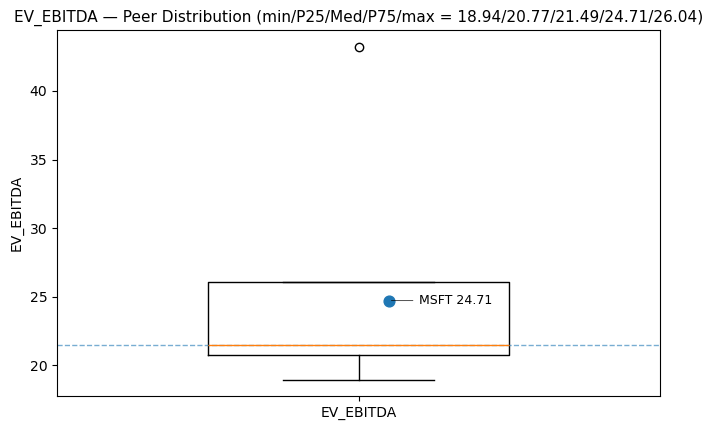

In [31]:
fig, ax = vit.plot_peer_metric_boxplot(
    peer_comp_detail=bands["peer_comp_detail"],
    peer_multiple_bands_wide=bands["peer_multiple_bands_wide"],
    metric="EV_EBITDA",
    target_ticker=target_ticker,
    include_target_in_stats=False)

In [32]:
pd.DataFrame(vit.historical_average_share_prices([target_ticker]))

,ticker,price_asof,avg_price_1d,avg_price_30d,avg_price_90d,avg_price_180d,notes
0,MSFT,2025-09-19,517.929993,505.855716,507.739977,465.649582,


In [33]:
TestBands = vit.peer_multiples(peer_group,target_ticker=target_ticker)
X=vit.price_from_peer_multiples(TestBands)
X

,Ticker,PE_Based_Valuation_P25_P50_P75,PS_Based_Valuation_P25_P50_P75,EV_EBITDA_Based_Valuation_P25_P50_P75,Inputs_Used,Notes
0,MSFT,"(387.06197426392896, 484.15296194946103, 511.1...","(314.6589936982763, 337.92622974355197, 414.48...","(447.66426922587897, 462.9524146741599, 558.68...","{'SharesOutstanding': 7433166379.0, 'NetIncome...",


In [34]:
print(X["PE_Based_Valuation_P25_P50_P75"][0])
print(X["PS_Based_Valuation_P25_P50_P75"][0])

(387.06197426392896, 484.15296194946103, 511.1354678799932)
(314.6589936982763, 337.92622974355197, 414.4847660281331)


## 2.5.1 Implied Enterprise Value From Historical Growth & FCF

-Whereas the scenario-based DCF (Section 9) projects forward with explicit assumptions, the Implied EV module looks backward: it uses historical averages of free cash flow and growth as if they were steady-state inputs into a perpetuity growth model.

-The question it answers is:“If we assume the company’s average historical FCF and growth continue indefinitely, what enterprise value (EV) does that imply — and how does it compare to today’s market EV?”

The calculation is based on the same Perpetuity Growth Method:

$$EV_{\text{implied}} = \frac{FCF_{\text{avg}} \cdot (1+g)}{WACC - g}$$

Where:
- $FCF_{\text{avg}}$ = average historical free cash flow (last 3 years be default)
- $g$ = average historical growth rate
- $WACC = R_f + \beta \cdot ERP$ (using yfinance beta, required else raises error)
- $g$ is capped at $WACC - 0.5\%$ to avoid unrealistic perpetuity assumptions
    
**Backward-Looking Limitations**: This approach assumes historical FCF and growth patterns represent sustainable steady-state conditions. This assumption is particularly problematic for:
- Cyclical businesses (captures arbitrary cycle positions)
- Companies undergoing strategic transitions
- Industries facing disruption or regulatory change
- Firms with significant one-time items in historical FCF


In [35]:
print(target_ticker)
pd.DataFrame(yf.Ticker(target_ticker).income_stmt.loc['Total Revenue'])

MSFT


,Total Revenue
2025-06-30,281724000000.0
2024-06-30,245122000000.0
2023-06-30,211915000000.0
2022-06-30,198270000000.0


In [36]:
print(target_ticker)
pd.DataFrame(yf.Ticker(target_ticker).income_stmt.loc['Net Income']) 
#Net Income = Earnings both terms refer to a company's total profit after all expenses, taxes, and costs have been deducted from total revenue.

MSFT


,Net Income
2025-06-30,101832000000.0
2024-06-30,88136000000.0
2023-06-30,72361000000.0
2022-06-30,72738000000.0


In [37]:
print(target_ticker)
pd.DataFrame(yf.Ticker(target_ticker).cashflow.loc['Free Cash Flow'])

MSFT


,Free Cash Flow
2025-06-30,71611000000.0
2024-06-30,74071000000.0
2023-06-30,59475000000.0
2022-06-30,65149000000.0
2021-06-30,NaN


In [38]:
vit.historical_growth_metrics(tickers=target_ticker)

,Ticker,Revenue_CAGR,Earnings_CAGR,FCF_CAGR,Period_Start_Year,Period_End_Year,Notes
0,MSFT,0.124231,0.118685,0.032026,2022,2025,


In [39]:
vit.historical_growth_metrics(tickers=peer_group)

,Ticker,Revenue_CAGR,Earnings_CAGR,FCF_CAGR,Period_Start_Year,Period_End_Year,Notes
0,MSFT,0.124231,0.118685,0.032026,2022,2025,
1,GOOGL,0.107543,0.096066,0.027830,2021,2024,
2,AMZN,0.107354,0.210966,NaN,2021,2024,FCF CAGR undefined (first/last ≤ 0).
3,AAPL,0.022470,-0.003335,0.053896,2021,2024,
4,META,0.117333,0.165682,0.115138,2021,2024,
5,NVDA,0.692547,0.955112,0.955967,2022,2025,


In [40]:
vit.compare_to_market_ev(target_ticker)  

,Ticker,Observed_EV,EV_Implied,Premium_%,Avg_FCF_Used,Growth_Used,WACC_Used,Years,Notes
0,MSFT,3.867479e+12,9.072585e+11,326.281919,6.524033e+10,0.032026,0.106238,0,Using historical FCF CAGR for growth. Perpetui...


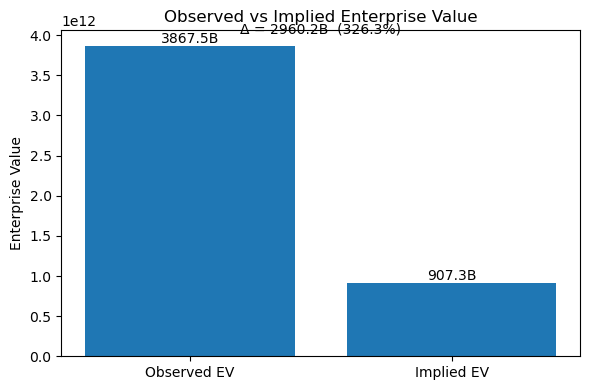

In [41]:
fig, ax = vit.plot_ev_observed_vs_implied(vit.compare_to_market_ev(target_ticker))

In [42]:
vit.compare_to_market_ev(target_ticker, growth=0.05)

,Ticker,Observed_EV,EV_Implied,Premium_%,Avg_FCF_Used,Growth_Used,WACC_Used,Years,Notes
0,MSFT,3.867479e+12,1.218072e+12,217.508207,6.524033e+10,0.05,0.106238,0,Using user-provided growth rate. Perpetuity-on...


In [43]:
vit.compare_to_market_ev(target_ticker,risk_free_rate=0.055,equity_risk_premium=0.065) 

,Ticker,Observed_EV,EV_Implied,Premium_%,Avg_FCF_Used,Growth_Used,WACC_Used,Years,Notes
0,MSFT,3.867479e+12,7.550141e+11,412.23929,6.524033e+10,0.032026,0.121203,0,Using historical FCF CAGR for growth. Perpetui...


In [44]:
# More realistic MSFT valuation
shorter_fcf_window_higher_growth= vit.compare_to_market_ev(
    target_ticker,
    use_average_fcf_years=2,     # Post-transformation FCF
    growth=0.0875                 # 8.5% sustainable growth  (arbitrary figure between 7.5 to 10)
)
shorter_fcf_window_higher_growth

,Ticker,Observed_EV,EV_Implied,Premium_%,Avg_FCF_Used,Growth_Used,WACC_Used,Years,Notes
0,MSFT,3.867479e+12,3.671228e+12,5.345645,6.325767e+10,0.0875,0.106238,0,Using user-provided growth rate. Perpetuity-on...


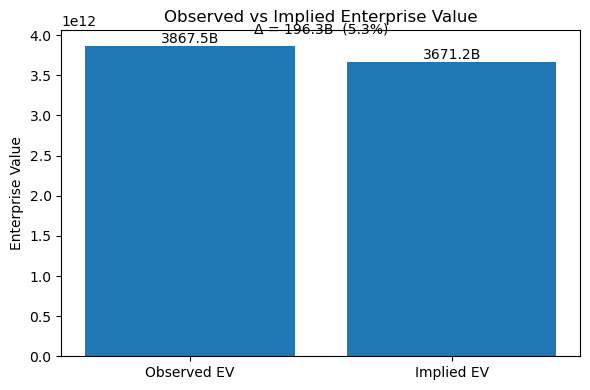

In [45]:
fig, ax = vit.plot_ev_observed_vs_implied(shorter_fcf_window_higher_growth)

## 2.5.2 Conversion of Implied Enterprise Value To Equity Value

**Equity Bridge** (EV → Equity → Per-share)

Once an implied EV is computed, it can be reconciled to equity value using standard adjustments:

$$\text{Equity} = EV - \text{Net Debt} + \text{Cash \& Equivalents} - \text{Minority Interest}$$

Then:

$$\text{Per-Share Implied} = \frac{\text{Equity}}{\text{Shares Outstanding}}$$

Implemented via `implied_equity_value_from_ev()`.

In [46]:
# Convert that implied EV to implied equity value (using the latest balance sheet)
vit.compare_to_market_cap(shorter_fcf_window_higher_growth)

,Ticker,Observed_MarketCap,Equity_Implied,Premium_%,EV_Implied,NetDebt,CashAndCashEquivalents,MinorityInterest,Avg_FCF_Used,Growth_Used,WACC_Used,Years,Notes
0,MSFT,3.849860e+12,3.640882e+12,5.739759,3.671228e+12,3.034600e+10,3.024200e+10,0.0,6.325767e+10,0.0875,0.106238,0,Using user-provided growth rate. Perpetuity-on...


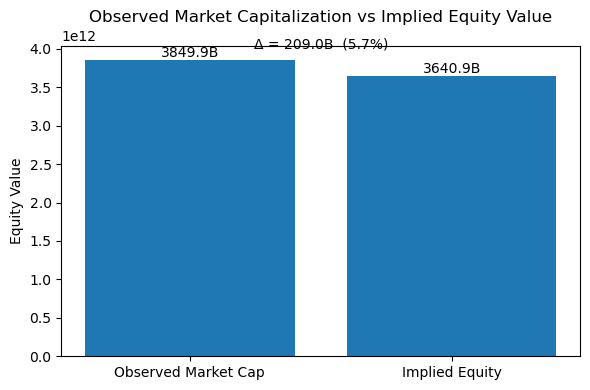

In [47]:
fig, ax = vit.plot_market_cap_observed_vs_implied_equity_val(vit.compare_to_market_cap(shorter_fcf_window_higher_growth))

### 2.6 Estimated Share Value From Discounted Cash Flow Projections

The DCF_Three_Scenarios function estimates enterprise value by discounting a finite stream of cash flows plus a terminal value via a Perpetuity Growth Method

$$
TV = \frac{FCF_{N} \cdot (1+g)}{WACC - g}
$$

$$
EV_{\text{implied}} = \sum_{t=1}^{N} \frac{FCF_t}{(1+WACC)^t} \;+\; \frac{TV}{(1+WACC)^N}
$$

Therefore this function estimates the
- WACC = risk_free_rate + beta * equity_risk_premium (β from yfinance).
- --If beta is missing → raises ValueError (can’t compute WACC).

- Growth seeding (g) follows this order:
- --If peer_tickers provided and ≥3 peers have revenue CAGRs → use P25/P50/P75 as Low/Mid/High.
- --Else use the target’s revenue CAGR (if available).
- --Else fallback to target_cagr_fallback = 0.02.

- Scenario WACC levels:
- --Mid: WACC_mid = Rf + β·ERP
- --Low-growth case uses WACC_high = WACC_mid + 1%
- --High-growth case uses WACC_low = WACC_mid − 1%

- Growth cap (guardrail): for each scenario, gused=min⁡(g,  WACCscenario−0.5%)g_{\text{used}}=\min(g,\;WACC_{\text{scenario}}-0.5\%)gused​=min(g,WACCscenario​−0.5%)

- FCF baseline: average of the last ~3 historical FCF points (Operating CF − CapEx) → used as FCFNFCF_NFCFN​.

- Per-share output: EV divided by latest shares outstanding → Per_Share_Value.

In [48]:
print(target_ticker) 
dcf = vit.dcf_three_scenarios(target_ticker) #let's switch focus to another peer
dcf

MSFT


,Scenario,Growth_Used,WACC_Used,Per_Share_Value
0,DCF_Lo_Growth_Lo_WACC,0.019216,0.101238,109.062
1,DCF_Mid_Growth_Mid_WACC,0.032026,0.106238,122.055
2,DCF_Hi_Growth_Hi_WACC,0.041634,0.116238,122.544


In [49]:
print(target_ticker)
dcf = vit.dcf_three_scenarios(target_ticker,
    peer_tickers=[peer1,peer2,peer3,peer4,peer5]) # Can define the peers to estimate growth based on average growth of peers 
#    years=5,
#    risk_free_rate=0.045,
#    equity_risk_premium=0.060 )
dcf

MSFT


,Scenario,Growth_Used,WACC_Used,Per_Share_Value
0,DCF_Lo_Growth_Lo_WACC,0.040863,0.101238,151.313
1,DCF_Mid_Growth_Mid_WACC,0.053896,0.106238,176.721
2,DCF_Hi_Growth_Hi_WACC,0.084517,0.116238,300.074


MSFT


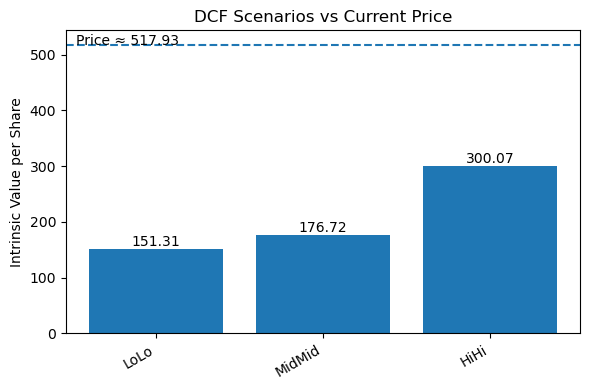

In [50]:
#Below allows for a plot of the various Estimated Per Share Value (across the 3 scenarios) vs CURRENT price today for the target company
print(target_ticker)
p1d, _, _ = vit._price_snapshots(target_ticker)
fig, ax = vit.plot_dcf_scenarios_vs_price(dcf, p1d)


In [51]:
print(target_ticker)
dcf_manual_fcf_growthrates = vit.dcf_three_scenarios(target_ticker,                      
    manual_baseline_fcf=70_000_000_000,    # Microsoft annual free cash flow for 2025 was $71.611B, a 3.32% decline from 2024. Microsoft annual free cash flow for 2024 was $74.071B, a 24.54% increase from 2023.                                                  
    manual_growth_rates=[0.050, 0.075, 0.100], 
    risk_free_rate=0.045,
    equity_risk_premium=0.06
)
dcf_manual_fcf_growthrates

MSFT


,Scenario,Growth_Used,WACC_Used,Per_Share_Value
0,DCF_Lo_Growth_Lo_WACC,0.050,0.101238,192.983
1,DCF_Mid_Growth_Mid_WACC,0.075,0.106238,324.074
2,DCF_Hi_Growth_Hi_WACC,0.100,0.116238,637.933


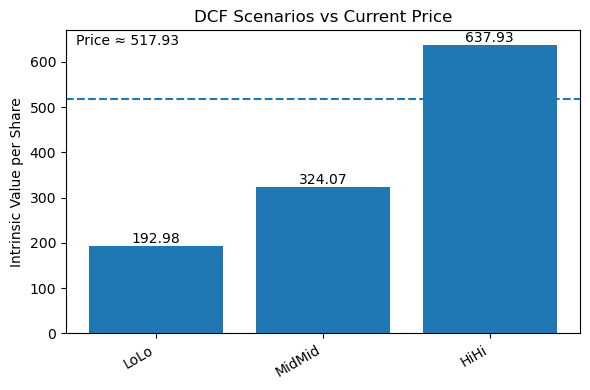

In [52]:
p1d, _, _ = vit._price_snapshots(target_ticker)
fig, ax = vit.plot_dcf_scenarios_vs_price(dcf_manual_fcf_growthrates, p1d)

# 3.0 Overall Orchestrator

The following function estimate_company_value runs ALL the functions above and saves the results. 


In [53]:
combined_output = vit.orchestrator_function(
    target_ticker,
    peer_tickers=peer_group,
    save_csv=False #, output_dir="output"
    )

In [54]:
combined_output

{'analysis_report_date': '2025-09-22',
 'ticker': 'MSFT',
 'peer_tickers': ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA'],
 'include_target_in_peers': False,
 'avg_price_1d': 517.9299926757812,
 'avg_price_30d': 505.855715797061,
 'avg_price_90d': 507.73997667100696,
 'avg_price_180d': 465.6495822753906,
 'price_asof': '2025-09-19',
 'growth_metrics':   Ticker  Revenue_CAGR  Earnings_CAGR  FCF_CAGR  Period_Start_Year  \
 0   MSFT      0.124231       0.118685  0.032026               2022   
 
    Period_End_Year Notes  
 0             2025        ,
 'fundamentals_actuals':   ticker  Profitability-ROE-Ave  Profitability-NetMargin-Ave  \
 0   AAPL               1.682738                     0.251172   
 1   AMZN               0.132882                     0.052881   
 2  GOOGL               0.279618                     0.258315   
 3   META               0.278987                     0.300428   
 4   MSFT               0.364127                     0.357336   
 5   NVDA               0.761

In [55]:
combined_output.keys()

dict_keys(['analysis_report_date', 'ticker', 'peer_tickers', 'include_target_in_peers', 'avg_price_1d', 'avg_price_30d', 'avg_price_90d', 'avg_price_180d', 'price_asof', 'growth_metrics', 'fundamentals_actuals', 'fundamentals_scores', 'peer_multiples', 'price_from_peer_multiples', 'ev_vs_market', 'market_cap_vs_equity', 'dcf_scenarios', 'data_health_report'])

In [56]:
combined_output['peer_multiples']['peer_multiple_bands_wide']

,Min,P25,Median,P75,Max,Average
PE,27.184631,28.253359,35.340458,37.310030,50.169490,35.651594
PS,3.684439,8.302142,8.916038,10.936002,26.023785,11.572481
EV_EBITDA,18.942000,20.767000,21.493000,26.039000,43.212000,26.090600


In [57]:
combined_output['dcf_scenarios']

,Scenario,Growth_Used,WACC_Used,Per_Share_Value
0,DCF_Lo_Growth_Lo_WACC,0.040863,0.101238,151.313
1,DCF_Mid_Growth_Mid_WACC,0.053896,0.106238,176.721
2,DCF_Hi_Growth_Hi_WACC,0.084517,0.116238,300.074


# 4.0 Data Health Report

In [58]:
# Access the health report directly
health = combined_output["data_health_report"]
health

[{'source': 'historical_average_share_prices',
  'ticker': None,
  'data_incomplete': None,
  'notes': []},
 {'source': 'historical_growth_metrics',
  'ticker': 'MSFT',
  'data_incomplete': None,
  'notes': ['']},
 {'source': 'compute_fundamentals_actuals',
  'ticker': None,
  'data_incomplete': False,
  'notes': []},
 {'source': 'compute_fundamentals_scores',
  'ticker': None,
  'data_incomplete': False,
  'notes': []},
 {'source': 'peer_multiples',
  'ticker': None,
  'data_incomplete': None,
  'notes': []},
 {'source': 'price_from_peer_multiples',
  'ticker': 'MSFT',
  'data_incomplete': None,
  'notes': ['']},
 {'source': 'compare_to_market_ev',
  'ticker': 'MSFT',
  'data_incomplete': None,
  'notes': ['Using historical FCF CAGR for growth. DCF with 5 years explicit forecast before terminal value. Observed EV significantly above DCF-implied EV (>20% premium); market expects higher growth or lower risk.']},
 {'source': 'compare_to_market_cap',
  'ticker': 'MSFT',
  'data_incomplete

In [59]:
tbls = vit.health_to_tables(combined_output["data_health_report"])
tbls

,Source,Ticker,Data Incomplete,Notes
0,compare_to_market_cap,MSFT,None,Using historical FCF CAGR for growth. DCF with...
1,compare_to_market_ev,MSFT,None,Using historical FCF CAGR for growth. DCF with...
2,compute_fundamentals_actuals,None,False,
3,compute_fundamentals_scores,None,False,
4,dcf_three_scenarios,None,None,
5,historical_average_share_prices,None,None,
6,historical_growth_metrics,MSFT,None,
7,peer_multiples,None,None,
8,price_from_peer_multiples,MSFT,None,


In [60]:
tbls.iloc[0]["Notes"]

'Using historical FCF CAGR for growth. DCF with 5 years explicit forecast before terminal value. Observed EV significantly above DCF-implied EV (>20% premium); market expects higher growth or lower risk. Using historical FCF CAGR for growth. DCF with 5 years explicit forecast before terminal value. Observed EV significantly above DCF-implied EV (>20% premium); market expects higher growth or lower risk. Minority Interest missing; treated as 0. Market Cap materially above Implied Equity (>20% premium).'